# YULU BUSINESS CASE

### Prepared by:- Deepali Gupta
### Batch:- DSML Feb 2023

![](yulu.png)

**Problem Statement**

Yulu, India's leading micro-mobility provider, faces declining revenues and seeks to understand the determinants of shared electric cycle demand in the Indian market. This project aims to identify the significant variables impacting demand, encompassing demographic, environmental, economic, infrastructure, and cultural factors. Through data collection, rigorous analysis, and predictive modeling, we aim to provide actionable insights and recommendations to reinvigorate Yulu's business strategy. The outcome will empower Yulu to navigate market dynamics effectively, enhance its services, and address the revenue decline, ensuring a sustainable and efficient micro-mobility solution for Indian commuters.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as mcolors
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import matplotlib.ticker as mticker
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_chisquare

In [2]:
warnings.filterwarnings("ignore")

Import Data Set

In [3]:
yulu=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [4]:
yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [5]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Columns

In [6]:
yulu.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Column description and data type**

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

**Observations**

Based on the provided information, here are some observations for the type of data in each column:

1) datetime: This column likely represents date and time values, but it is currently stored as an object data type. To perform date and time-related operations, it should be converted to a datetime data type.

2) season: This column is represented as an integer (int64) data type. It likely contains categorical data representing different seasons (e.g., 1 for spring, 2 for summer, etc.).

3) holiday: This column is also represented as an integer (int64) data type, indicating whether a day is a holiday or not (e.g., 1 for a holiday, 0 for a regular day).

4) workingday: Similar to 'holiday,' this column is represented as an integer (int64) data type, likely indicating whether a day is a working day or not (e.g., 1 for a working day, 0 for a non-working day).

5) weather: This column is an integer (int64) data type, probably representing different weather conditions (e.g., 1 for clear, 2 for cloudy, etc.).

6) temp: This column is represented as a floating-point (float64) data type, indicating the temperature.

7) atemp: Similar to 'temp,' this column is also represented as a floating-point (float64) data type, likely indicating the "feels-like" temperature.

8) humidity: This column is represented as an integer (int64) data type, indicating the humidity level.

9) windspeed: This column is represented as a floating-point (float64) data type, likely indicating the wind speed.

10) casual: This column is an integer (int64) data type, probably representing the count of casual users of a service or system.

11) registered: Similar to 'casual,' this column is also an integer (int64) data type, likely representing the count of registered users of a service or system.

12) count: This column is an integer (int64) data type, presumably representing the total count or demand for a service or system, which may be the sum of 'casual' and 'registered' users.

These observations provide an initial understanding of the data types and the potential meanings of the columns. Further analysis and data preprocessing may be required depending on the specific analytical goals and tasks related to this dataset.

##### Converting Columns into required Data type

In [7]:
yulu['datetime']=pd.to_datetime(yulu['datetime'])
yulu['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

Converting weather data type to object

In [8]:
yulu['weather'].unique()

array([1, 2, 3, 4])

In [9]:
yulu

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [10]:
weather_mapping={1:'clear',2:'mist+cloudy',3:'light_snow',4:'ice_palletes'}
yulu['weather']=yulu['weather'].map(weather_mapping).astype('category')

In [11]:
yulu['weather']

0        clear
1        clear
2        clear
3        clear
4        clear
         ...  
10881    clear
10882    clear
10883    clear
10884    clear
10885    clear
Name: weather, Length: 10886, dtype: category
Categories (4, object): ['clear', 'ice_palletes', 'light_snow', 'mist+cloudy']

In [12]:
yulu["holiday"] = yulu["holiday"].astype("object")
yulu["workingday"] = yulu["workingday"].astype("object")
yulu["weather"] = yulu["weather"].astype("object")

In [13]:
holiday_mapping={0:'holiday',1:'Not Holiday'}
yulu['holiday']=yulu['holiday'].map(holiday_mapping)
yulu['holiday']

0        holiday
1        holiday
2        holiday
3        holiday
4        holiday
          ...   
10881    holiday
10882    holiday
10883    holiday
10884    holiday
10885    holiday
Name: holiday, Length: 10886, dtype: object

In [14]:
season_mapping={1:'spring',2:'summer',3:'fall',4:'winter'}
yulu['season']=yulu['season'].map(season_mapping)
yulu['season']


0        spring
1        spring
2        spring
3        spring
4        spring
          ...  
10881    winter
10882    winter
10883    winter
10884    winter
10885    winter
Name: season, Length: 10886, dtype: object

In [15]:
#Insert 'workingday_cat' after 'workingday' to categorize working day status.
yulu.insert(yulu.columns.get_loc("workingday")+1, 'workingday_cat', yulu["workingday"].map({
 1: "Working Day",
 0: "Non Working Day"
}))

In [16]:
plot_palette=['#a7cced','#304d6d','#82a0bc','#63adf2']

#### Descriptive Statistics

In [17]:
yulu.describe().round(2)

temp     atemp  humidity  windspeed    casual  registered     count
count  10886.00  10886.00  10886.00   10886.00  10886.00    10886.00  10886.00
mean      20.23     23.66     61.89      12.80     36.02      155.55    191.57
std        7.79      8.47     19.25       8.16     49.96      151.04    181.14
min        0.82      0.76      0.00       0.00      0.00        0.00      1.00
25%       13.94     16.66     47.00       7.00      4.00       36.00     42.00
50%       20.50     24.24     62.00      13.00     17.00      118.00    145.00
75%       26.24     31.06     77.00      17.00     49.00      222.00    284.00
max       41.00     45.46    100.00      57.00    367.00      886.00    977.00

In [18]:
yulu.describe(include='object')

season  holiday  workingday workingday_cat weather
count    10886    10886       10886          10886   10886
unique       4        2           2              2       4
top     winter  holiday           1    Working Day   clear
freq      2734    10575        7412           7412    7192

In [19]:
yulu['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

#### Missing Value Detection

In [20]:
yulu.isna().sum()

datetime          0
season            0
holiday           0
workingday        0
workingday_cat    0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
dtype: int64

No null values are present in the dataset


## Univariate Analysis:

In [59]:
season_counts = yulu.groupby('season')['count'].sum()
season_counts

season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

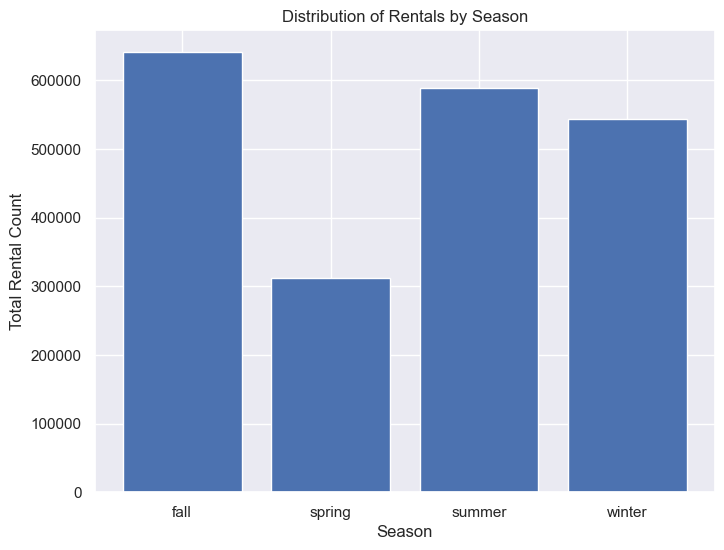

In [61]:
season_counts = yulu.groupby('season')['count'].sum()
# Define season names for better visualization
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Total Rental Count')
plt.title('Distribution of Rentals by Season')
plt.show()

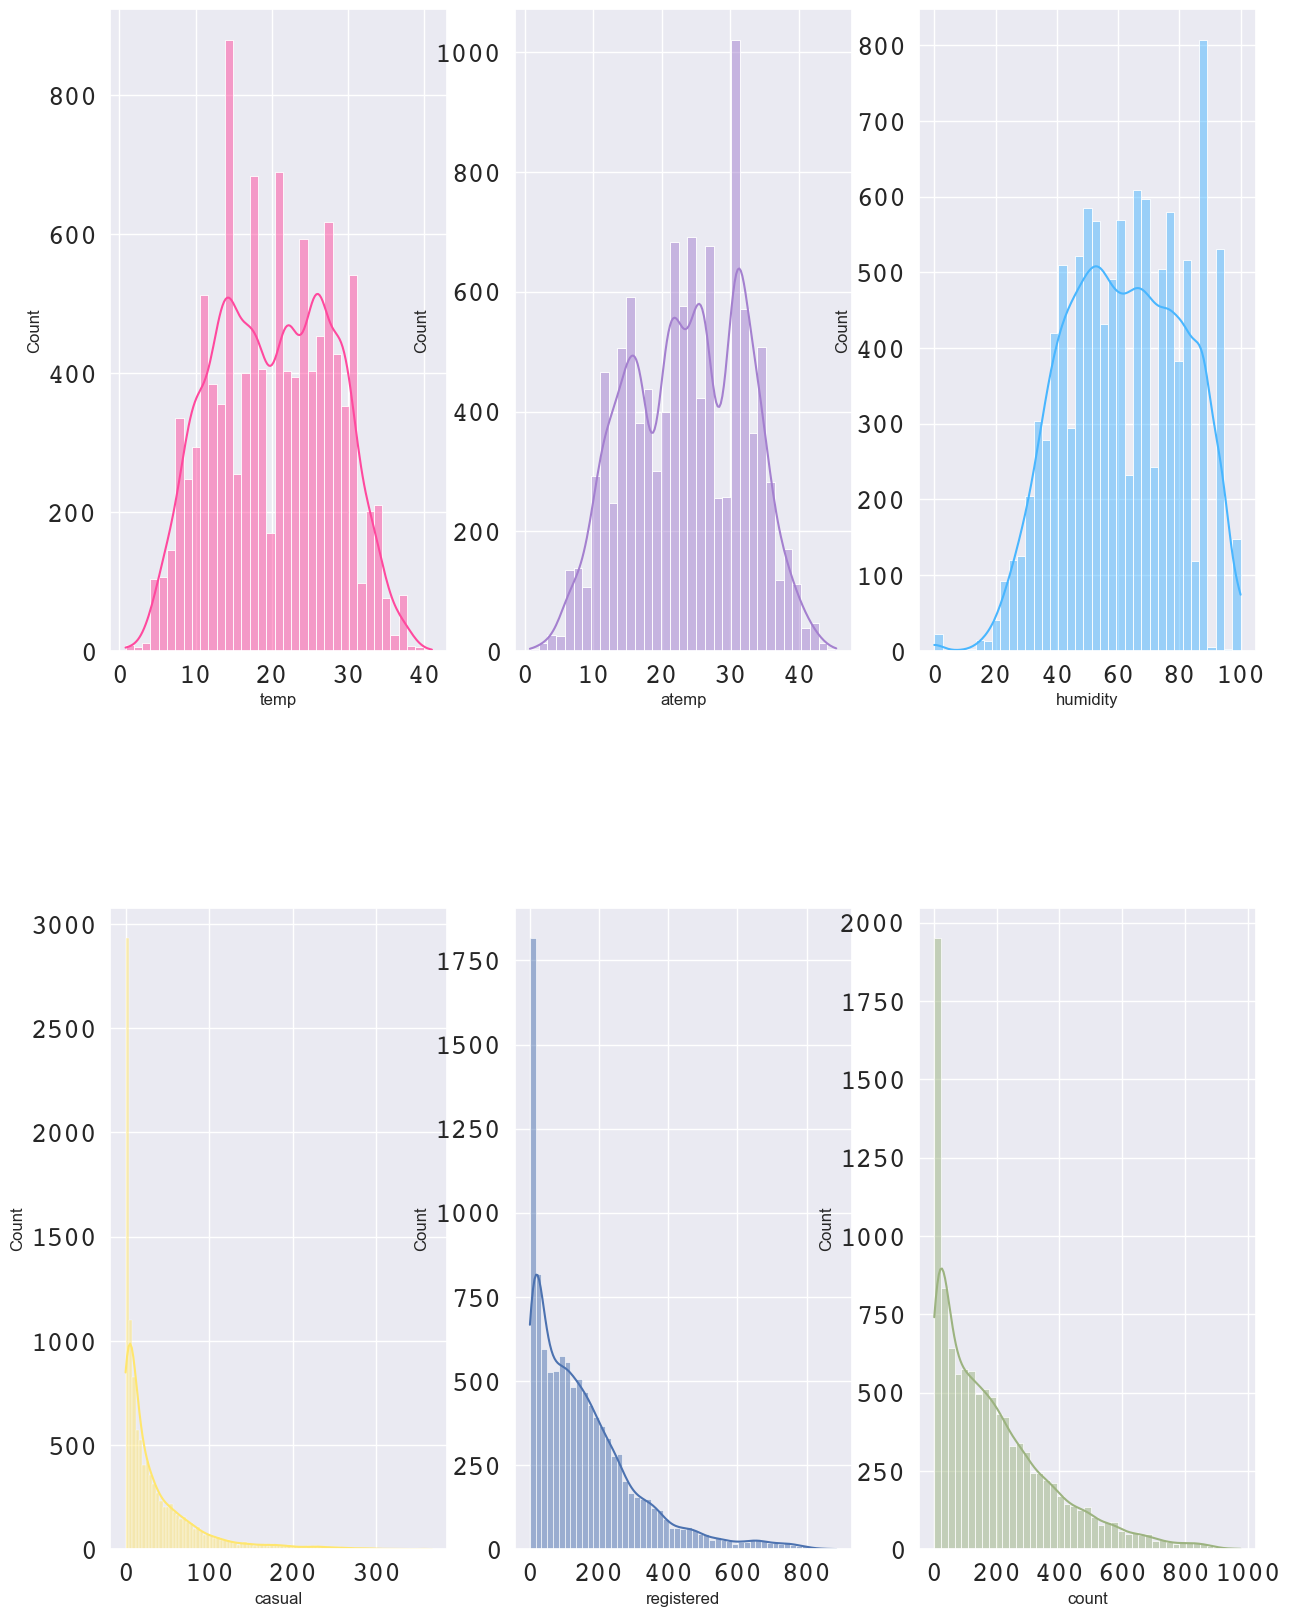

In [71]:
fig=plt.figure(figsize=(20,20))

plt.subplot(2,4,1)
sns.histplot(yulu['temp'],kde=True,color='#ff499e')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')


plt.subplot(2,4,2)
sns.histplot(yulu['atemp'],kde=True,color='#a480cf')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')


plt.subplot(2,4,3)
sns.histplot(yulu['humidity'],kde=True,color='#49b6ff')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')



plt.subplot(2,4,5)
sns.histplot(yulu['casual'],kde=True,color='#ffe66d')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')

plt.subplot(2,4,6)
sns.histplot(yulu['registered'],kde=True,color='b')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')


plt.subplot(2,4,7)
sns.histplot(yulu['count'],kde=True,color='#9cb380')
plt.xticks(fontsize = 20, fontname='Courier')
plt.yticks(fontsize = 20, fontname='Courier')

plt.subplots_adjust(hspace=0.4)

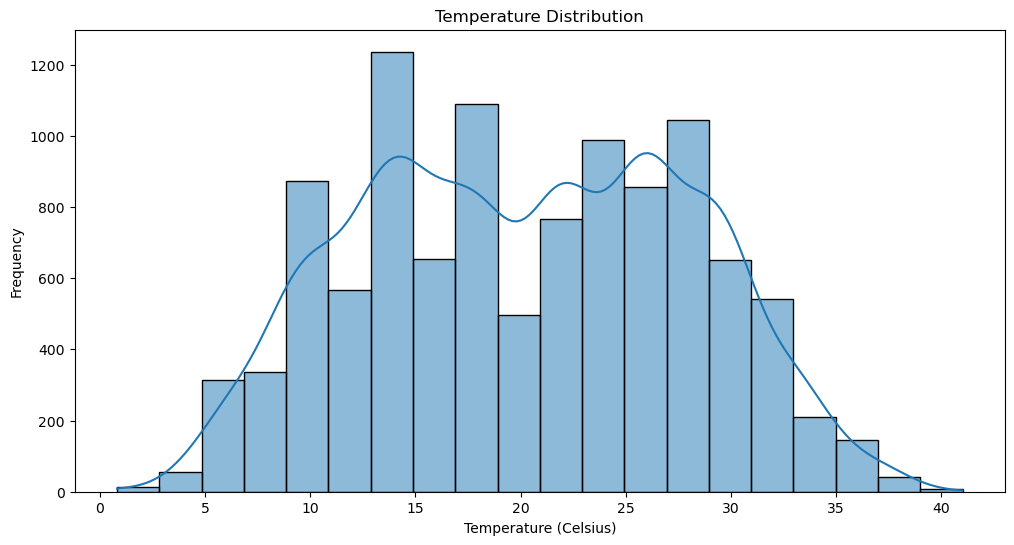

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(yulu['temp'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

***CYCLES RENTED IN EACH WEATHER is ***


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

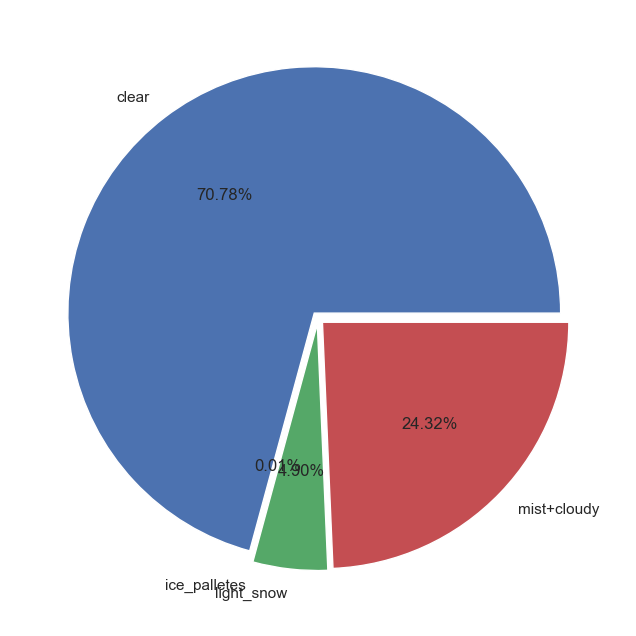

In [67]:
plt.figure(figsize=(8, 8))
total_count_by_weather=yulu.groupby('weather')[['count', 'registered', 'casual']].sum().reset_index()
print("***CYCLES RENTED IN EACH WEATHER is ***")
# Creating the pie-chart
plt.pie(x = total_count_by_weather['count'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = total_count_by_weather['weather'],
        autopct = '%.2f%%')
plt.plot

In [68]:
total_count_by_weather

weather    count  registered  casual
0         clear  1476063     1186163  289900
1  ice_palletes      164         158       6
2    light_snow   102089       87106   14983
3   mist+cloudy   507160      419914   87246

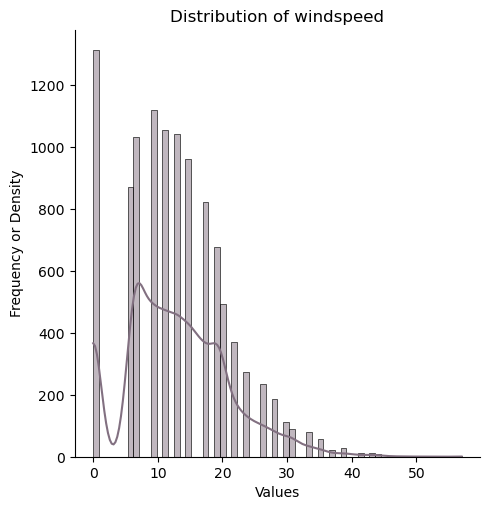

In [27]:
sns.displot(data=yulu, x='windspeed', kde=True,color='#827081')  # 'kde=True' adds a Kernel Density Estimation plot
plt.title('Distribution of windspeed')
plt.xlabel('Values')
plt.ylabel('Frequency or Density')
plt.show()

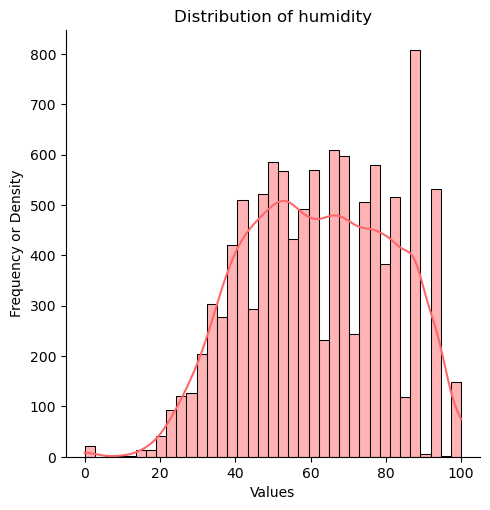

In [28]:
sns.displot(data=yulu, x='humidity', kde=True,color='#ff686b')  # 'kde=True' adds a Kernel Density Estimation plot
plt.title('Distribution of humidity')
plt.xlabel('Values')
plt.ylabel('Frequency or Density')
plt.show()

# BIVARIATE ANALYSIS

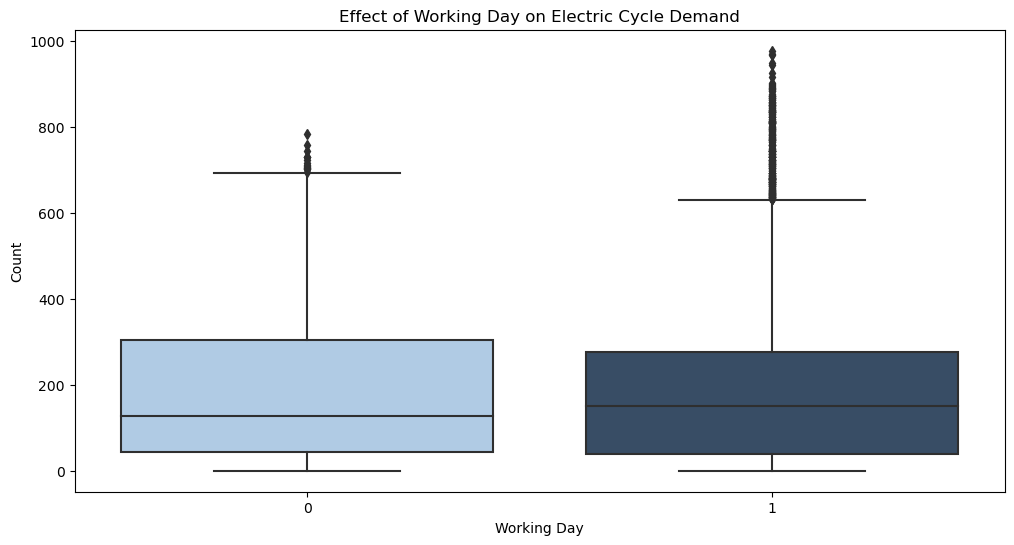

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workingday', y='count', data=yulu,palette=plot_palette)
plt.title('Effect of Working Day on Electric Cycle Demand')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

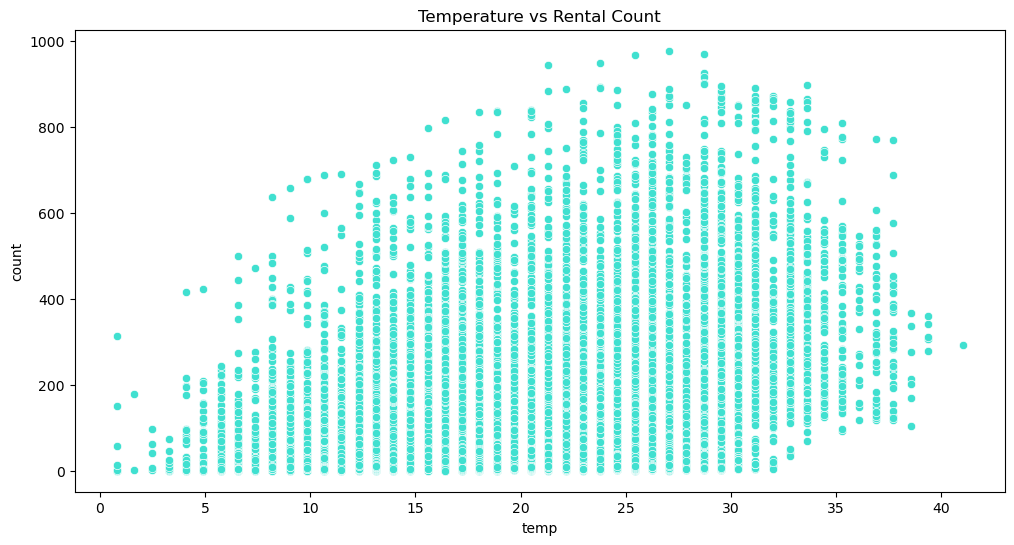

In [30]:
# Scatter plot for 'temp' vs 'count'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yulu, x='temp', y='count',color='turquoise')
plt.title('Temperature vs Rental Count')
plt.show()


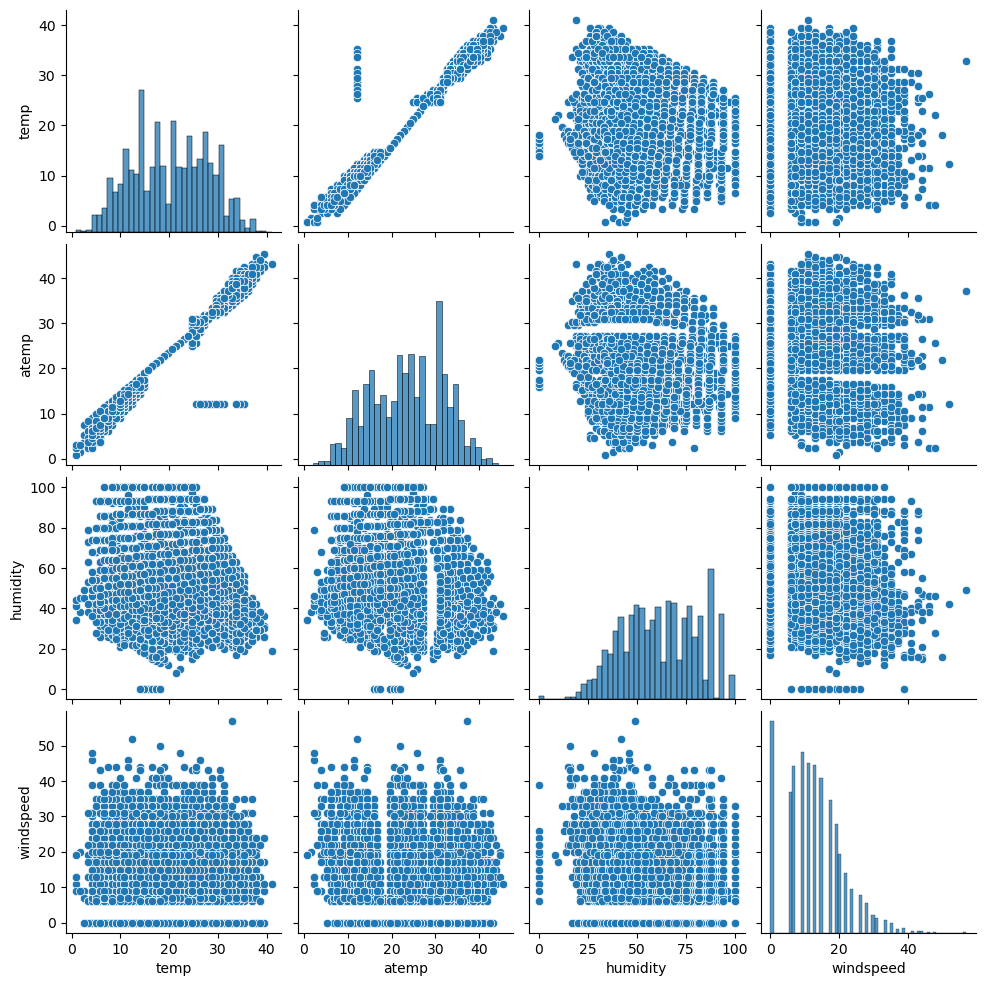

In [31]:
sns.pairplot(yulu[['temp', 'atemp', 'humidity', 'windspeed']],palette=plot_palette)
plt.show()

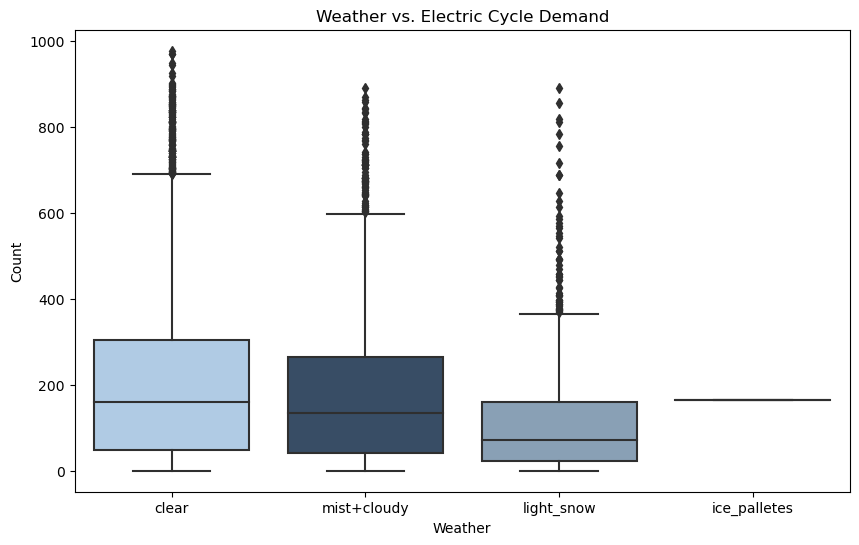

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=yulu,palette=plot_palette)
plt.title('Weather vs. Electric Cycle Demand')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

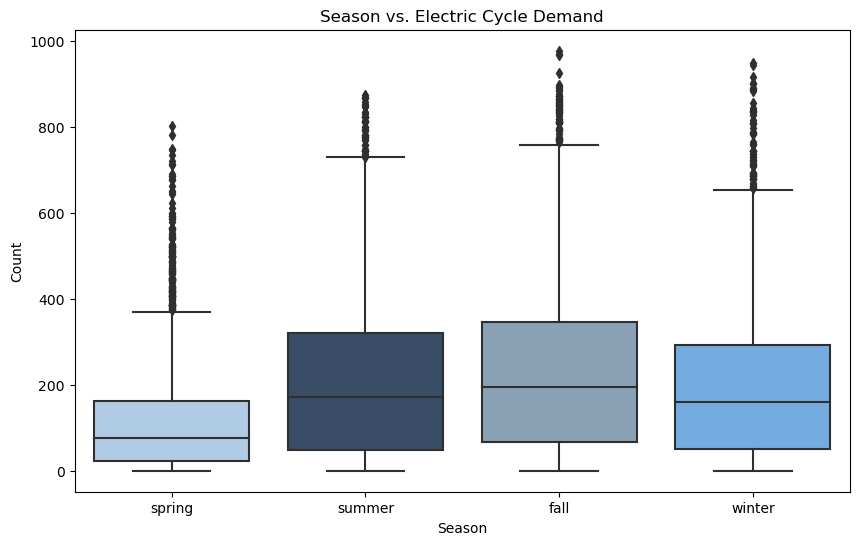

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=yulu,palette=plot_palette)
plt.title('Season vs. Electric Cycle Demand')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

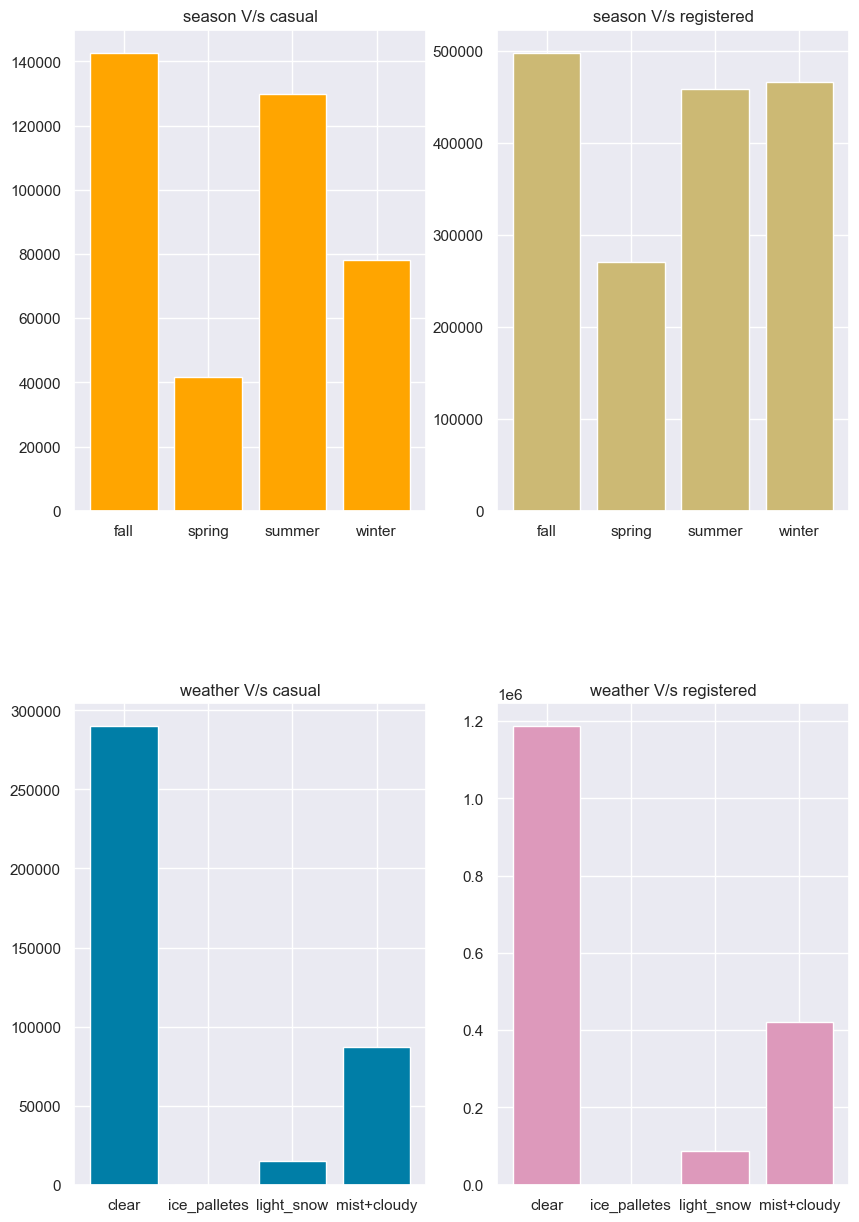

In [74]:
fig=plt.figure(figsize=(10,15))
season_group=yulu.groupby('season')['casual'].sum()
season_group_reg=yulu.groupby('season')['registered'].sum()
weather_group=yulu.groupby('weather')['casual'].sum()
weather_group_reg=yulu.groupby('weather')['registered'].sum()
plt.subplot(2,2,1)
plt.title('season V/s casual')
plt.bar(season_group.index,season_group.values,color='orange')
plt.subplot(2,2,2)
plt.title('season V/s registered')
plt.bar(season_group_reg.index,season_group_reg.values,color='y')
plt.subplot(2,2,3)
plt.title('weather V/s casual')
plt.bar(weather_group.index,weather_group.values,color='#007ea7')
plt.subplot(2,2,4)
plt.title('weather V/s registered')
plt.bar(weather_group_reg.index,weather_group_reg.values,color='#dd99bb')
plt.subplots_adjust(hspace=0.4)

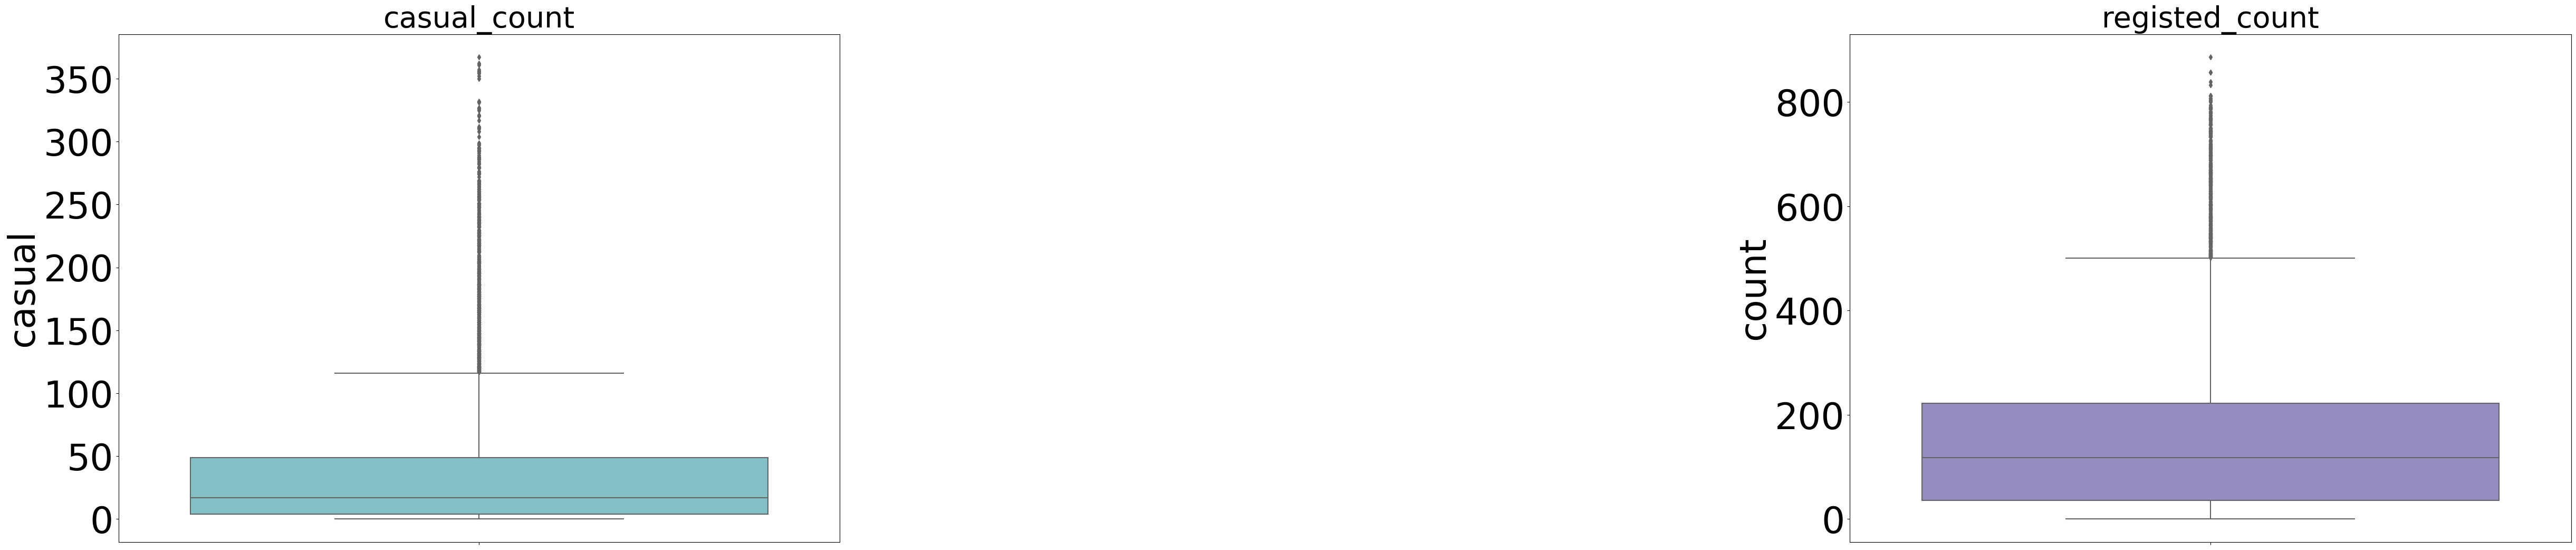

In [35]:
fig=plt.figure(figsize=(60,100))
plt.subplot(2,3,1)
plt.title('casual_count',fontsize=40)
plt.yticks(fontsize = 50)
plt.ylabel('count',fontsize = 50)
sns.boxplot(y=yulu['casual'],color='#78cad2')
plt.subplot(2,3,3)
plt.title('registed_count',fontsize=40)
plt.yticks(fontsize = 50)
sns.boxplot(y=yulu['registered'],color='#8d86c9')
plt.ylabel('count',fontsize = 50)
plt.subplots_adjust(hspace=6)
plt.show()

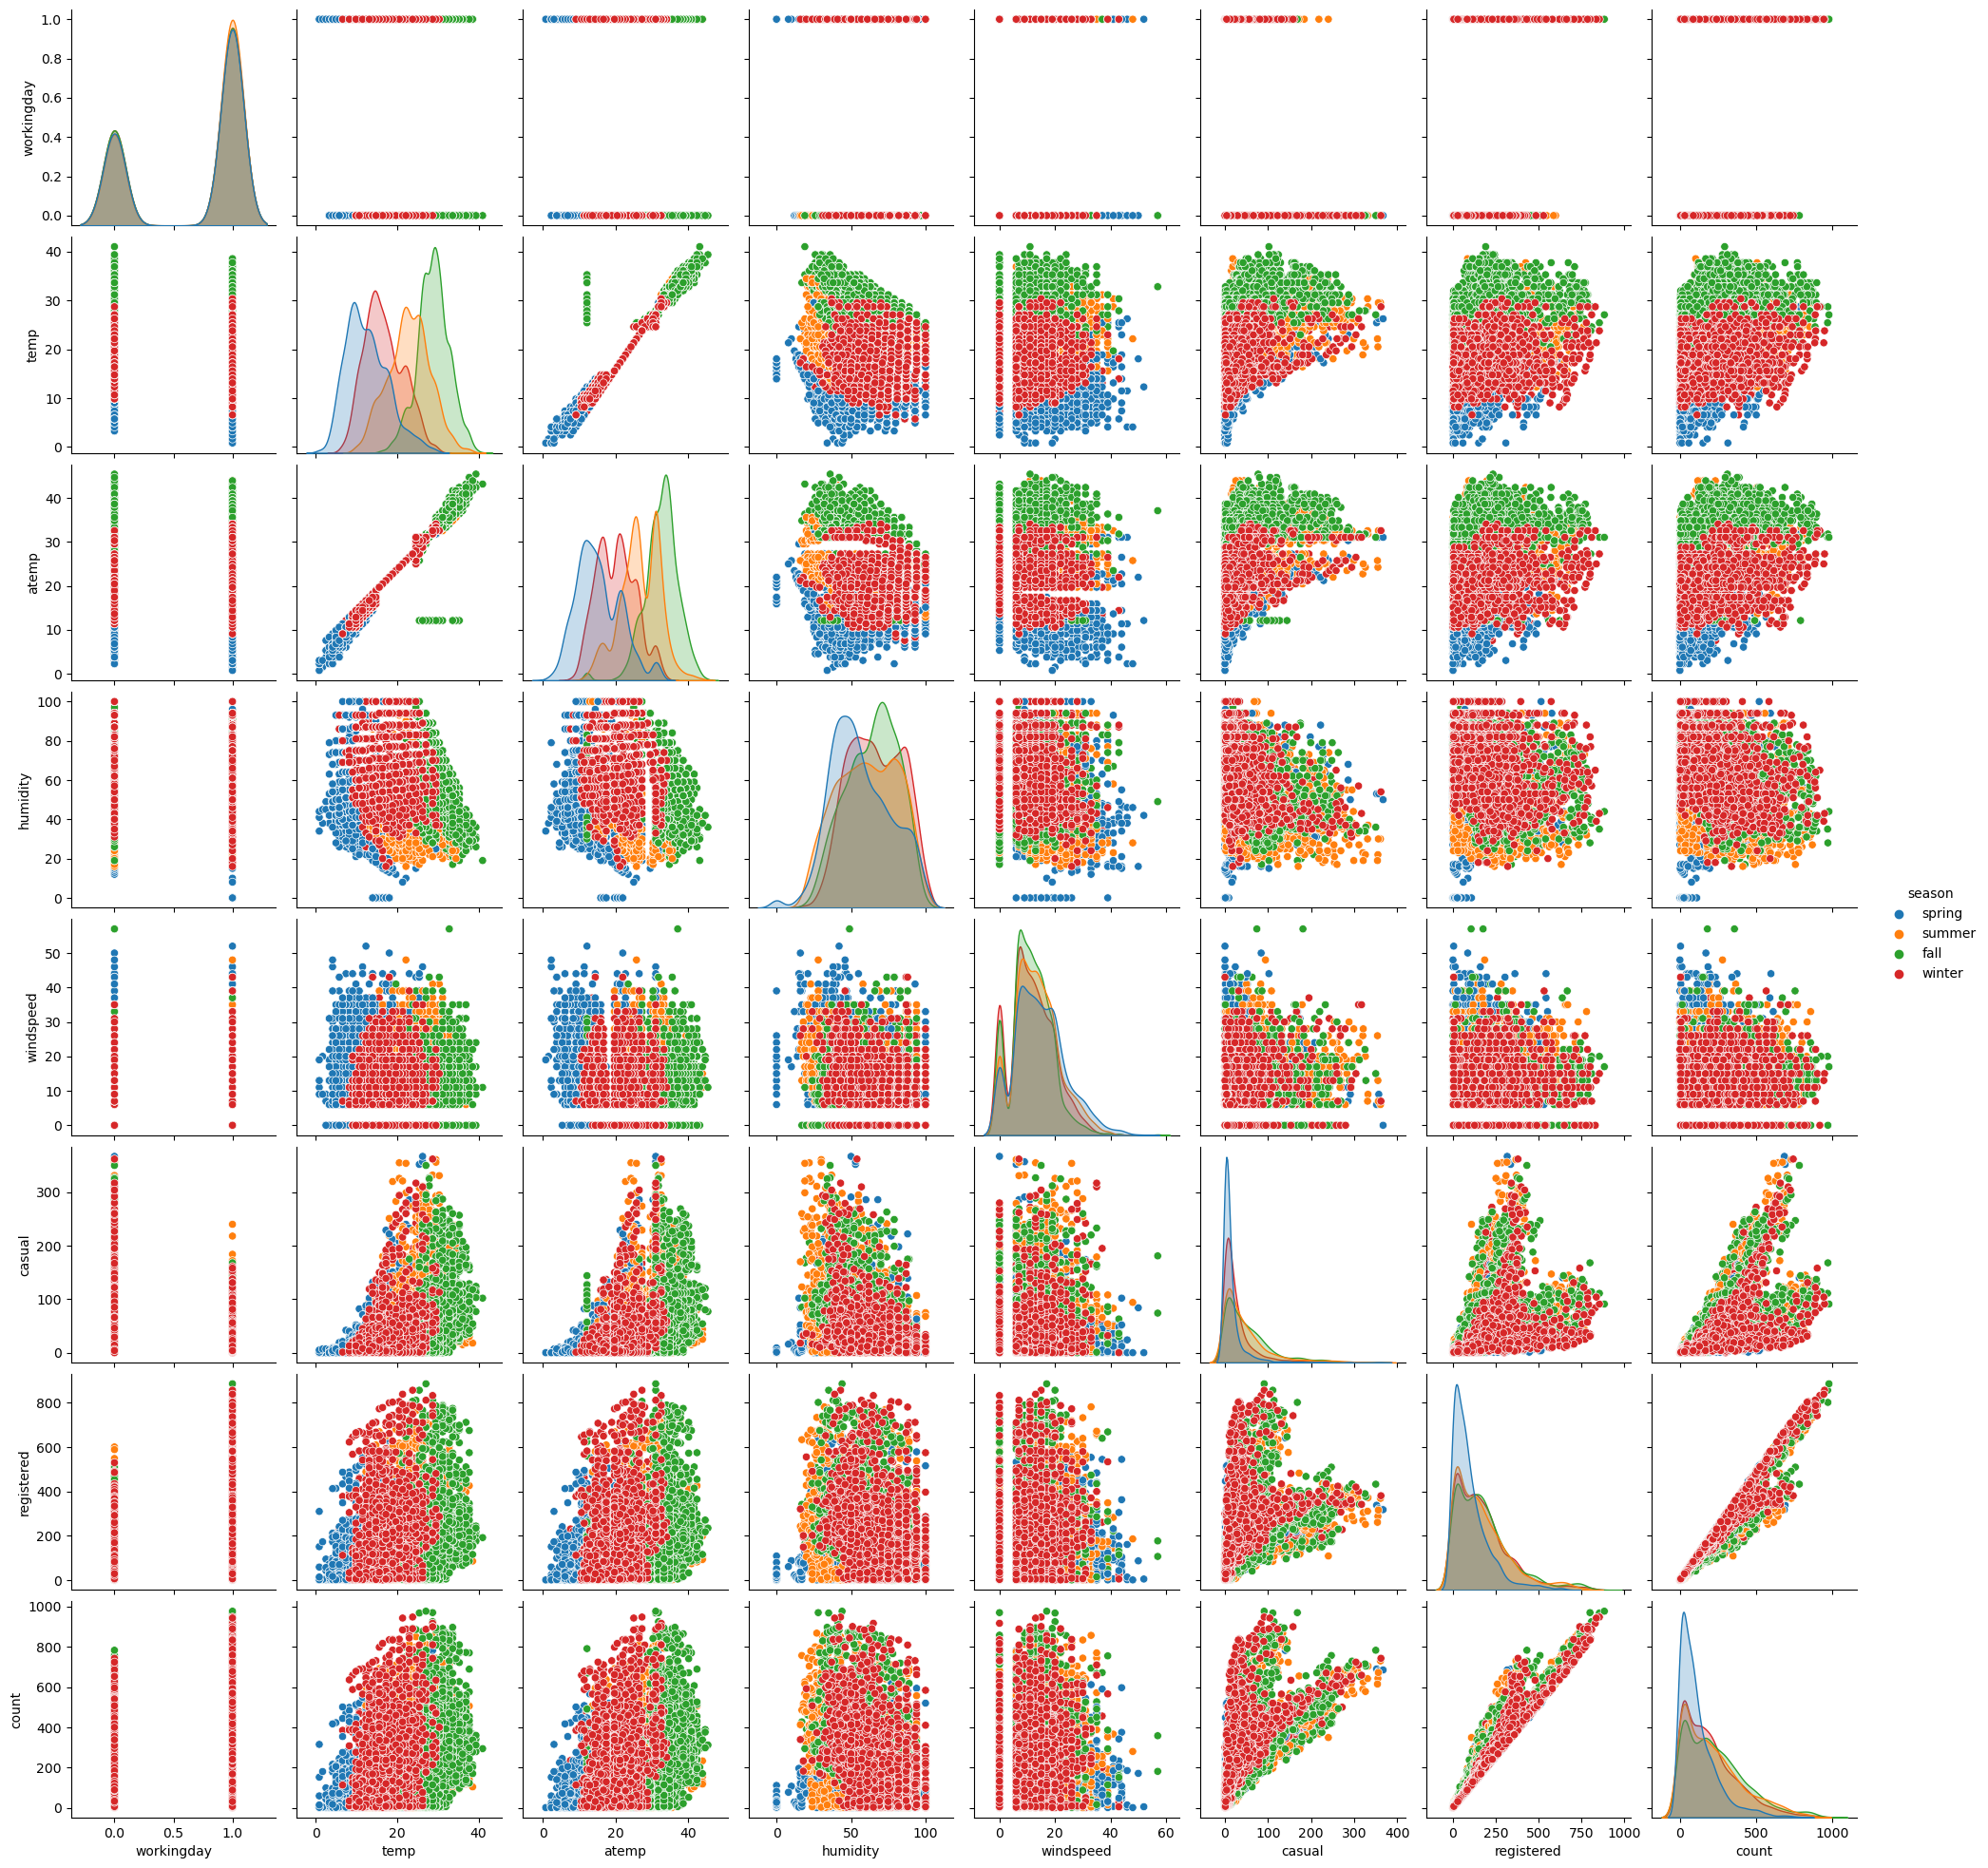

In [36]:
sns.pairplot(data=yulu,hue='season')

In [37]:
corr_matrix = yulu.corr()

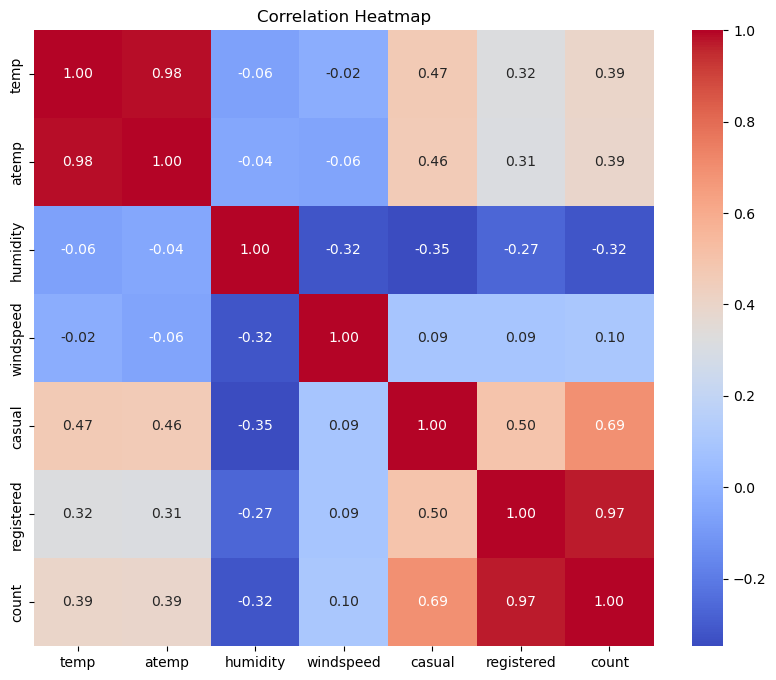

In [38]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection

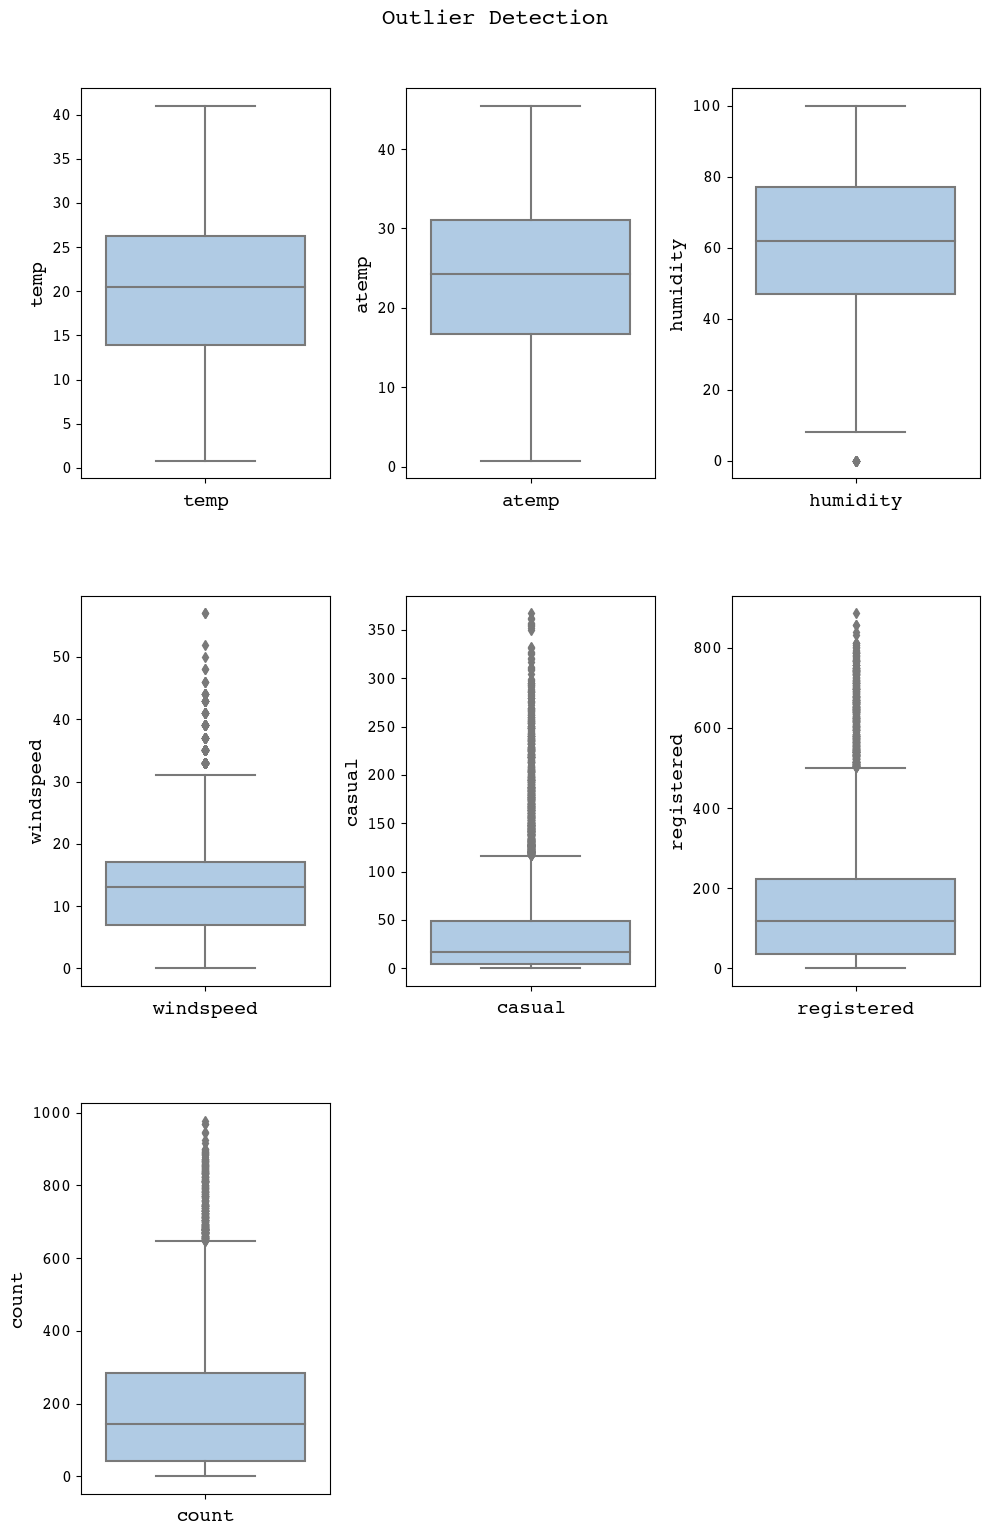

In [39]:
num_cols = yulu.select_dtypes(include='number').columns
fig=plt.figure(figsize=(10,15)).suptitle("Outlier Detection", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
 plt.subplot(3,3,i+1)
 sns.boxplot(y=num_cols[i], data=yulu, palette=plot_palette)
 plt.xticks(fontsize = 12, fontname='Courier')
 plt.yticks(fontsize = 12, fontname='Courier')
 plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
 plt.ylabel(num_cols[i], fontsize = 14, fontname='Courier')
 #plt.title(num_cols[i], y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
#plt.subplots_

**Hypothesis Testing**

**Assumption**
alpha=5%

## Hypothesis Testing 2

The number of electric cycles rented is influenced by whether it's a working day or not. To examine this, we will employ a two-sample t-test since we are comparing a numerical variable with two categories: working and non-working days. We need to validate the following assumptions for the t-test:

The data should exhibit a normal distribution.
There should be equal variance within each group.
The data must consist of continuous values.
The sample data should have been randomly selected from the population.

In [44]:
working_rentals = yulu[yulu["workingday_cat"] == "Working Day"]["count"]
non_working_rentals = yulu[yulu["workingday_cat"] == "Non Working Day"]["count"]

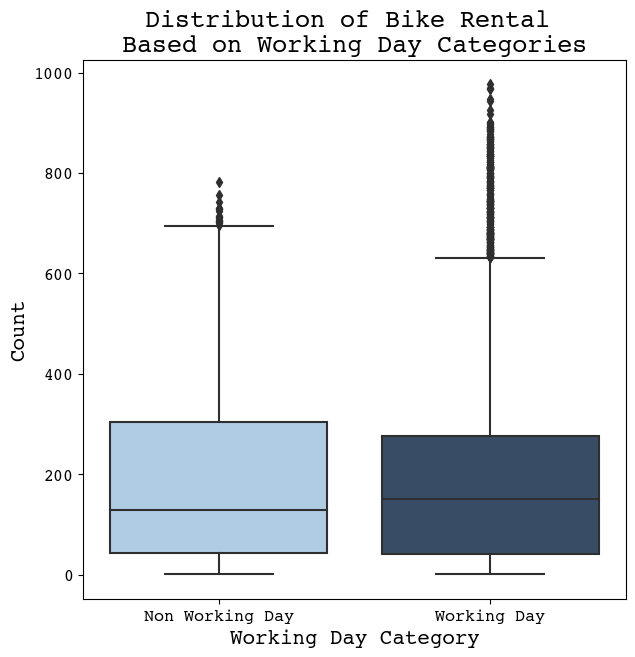

In [45]:
fig=plt.figure(figsize=(7,7))
#sns.set(style = 'darkgrid')
sns.boxplot(data=yulu, x="workingday_cat", y="count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Working Day Category", fontsize = 15, fontname='Courier')
plt.ylabel("Count", fontsize = 15, fontname='Courier')
plt.title("Distribution of Bike Rental \nBased on Working Day Categories", fontsize = 18, fontname='Courier')
plt.show()

Text(0.5, 1.02, 'Quantile-Quantile Plot of\n Working Day Rental')

<Figure size 500x500 with 0 Axes>

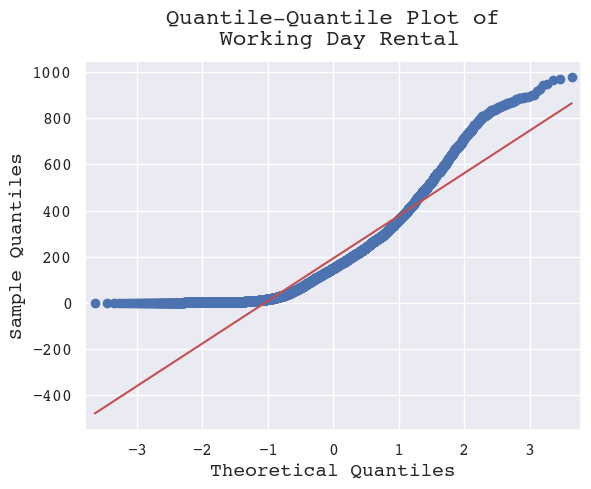

In [46]:
# Q-Q plot for working day rentals.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(working_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Working Day Rental", y=1.02, fontsize=16, fontname='Courier')

In [47]:
# Perform Shapiro-Wilk test to check if working day data follows a normal distribution and make a hypothesis decision.
H0 = "Working day data follows normal distribution"
Ha = "Working day data doesn't follow a normal distribution"
test_stat, p_value = shapiro(working_rentals.sample(200))
print(test_stat, p_value)
if p_value < alpha:
 print("Reject H0, ", Ha)
else:
 print("Fail to reject H0, ", H0)

0.8636847734451294 2.087876963333124e-12
Reject H0,  Working day data doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

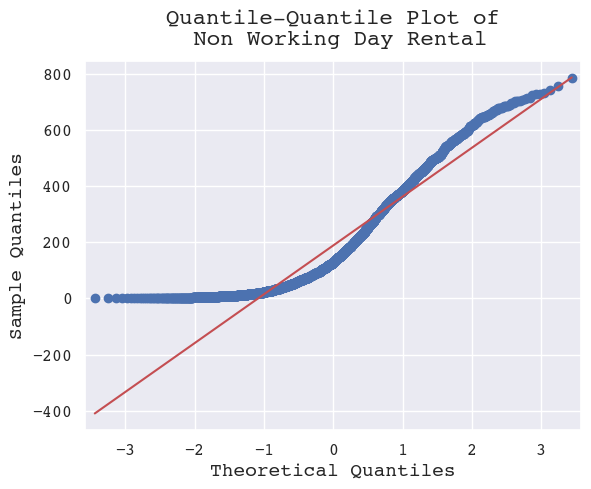

In [48]:
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(non_working_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Non Working Day Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [49]:
# Perform Shapiro-Wilk test to check if non working day data follows a normal distribution and make a hypothesis decision.
H0 = "Non working day data follows normal distribution"
Ha = "Non working day data doesn't follow a normal distribution"
test_stat, p_value = shapiro(non_working_rentals.sample(200))
print(test_stat, p_value)
if p_value < alpha:
 print("Reject H0, ", Ha)
else:
 print("Fail to reject H0, ", H0)

0.8760561347007751 9.585823454449915e-12
Reject H0,  Non working day data doesn't follow a normal distribution


The result of the Shapiro-Wilk test, which rejects the null hypothesis that "Non-working day data follows a normal distribution," indicates that the data for non-working days is not normally distributed. Here are insights and recommendations based on this finding:

Insights:

Non-Normal Distribution: The data for non-working days does not exhibit a normal distribution. This suggests that the distribution of electric cycle rentals on non-working days may have a different shape, which can affect statistical analyses that assume normality.

Potential Skewness: The deviation from normality implies that there may be skewness or outliers in the distribution of electric cycle rentals on non-working days. These deviations can impact the accuracy of predictions and analyses.

Recommendations:

Robust Statistical Methods: Given the non-normal distribution, consider using robust statistical methods that are less sensitive to deviations from normality for any analyses involving non-working day data. This can include non-parametric tests or bootstrapping techniques.

Data Transformation: Explore data transformation techniques (e.g., logarithmic or Box-Cox transformations) to make the non-working day data more closely approximate a normal distribution. This may help if normality is crucial for specific analyses.

Outlier Detection: Identify and investigate potential outliers in the non-working day data. Outliers may be driving the deviation from normality, and addressing them appropriately can improve the data's normality.

## Levene Test

In [50]:
#Check if the variance within groups is similar and determine hypothesis outcome.
H0 = "Variance within group is similar"
Ha = "Variance within group is not similar"
levene_stat, p_value = levene(
 non_working_rentals,
 working_rentals
)
print(test_stat, p_value)
if p_value < alpha:
 print("Reject H0, ", Ha)
else:
 print("Fail to reject H0, ", H0)

0.8760561347007751 0.9437823280916695
Fail to reject H0,  Variance within group is similar


The result of Levene's test, which indicates that the variance within groups is similar (i.e., fails to reject the null hypothesis), provides valuable insights and recommendations for your analysis. Here are specific insights and recommendations:

**Insights:**

1. **Homogeneity of Variance:** The test results suggest that the variances of electric cycle rentals across different groups (possibly seasons or other categories) are not significantly different. This implies that the variability in rental counts within each group is relatively consistent.

2. **Equal Variance Assumption:** Meeting the assumption of equal variance is essential for certain statistical tests, such as ANOVA. The result suggests that for the variables and groups tested, this assumption is likely met.

**Recommendations:**

1. **Valid ANOVA Assumption:** Since the test indicates similar variances within groups, you can proceed with ANOVA and related analyses that assume equal variance. This is particularly important when comparing means across different groups, such as seasons or categories.

2. **Interpretation:** When interpreting the results of ANOVA or other statistical tests, keep in mind that the assumption of equal variance holds for the tested variables and groups. Be cautious if you plan to perform additional analyses that assume equal variance.

3. **Graphical Exploration:** Create graphical representations, such as box plots or dispersion plots, to visualize the homogeneity of variance across different groups. This can provide a clearer understanding of how variance is distributed within each group.

4. **Further Testing:** While Levene's test is a valuable initial assessment of equal variance, consider conducting additional tests or visual checks if you have concerns about the assumption of homogeneity of variance. This may involve examining residual plots or conducting alternative variance tests.

BOOTSTRAPPING

In [75]:
workingday_rentals = yulu[yulu["workingday"] == 1]["count"]
non_workingday_rentals = yulu[yulu["workingday"] == 0]["count"]

num_samples = 500 

bootstrap_means_workingday = []
bootstrap_means_non_workingday = []

for i in range(num_samples):
    bootstrap_sample = np.random.choice(workingday_rentals, size=200, replace=True)
    bootstrap_means_workingday.append(np.mean(bootstrap_sample))

for i in range(num_samples):
    bootstrap_sample = np.random.choice(non_workingday_rentals, size=200, replace=True)
    bootstrap_means_non_workingday.append(np.mean(bootstrap_sample))

## 2 sample T-test

In [76]:
# Define your hypotheses
H0 = "Working Day has no effect on the number of electric cycles rented."
H1 = "Working Day has an effect on the number of electric cycles rented."

# Perform the T-Test
t_stat, p_value = stats.ttest_ind( bootstrap_means_workingday, bootstrap_means_non_workingday)

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print(f'Reject H0: {H1}')
else:
    print(f'Fail to reject H0: {H0}')

Reject H0: Working Day has an effect on the number of electric cycles rented.


Reject the null hypothesis (H0) that "Working Day has no effect on the number of electric cycles rented," it implies that there is a statistically significant difference in the number of electric cycles rented between working days and non-working days. In other words, working days do have an effect on the rental demand. Here are insights and recommendations based on this rejection:

Insights:

Working Days Drive Rental Demand: The analysis suggests that there is a significant difference in the demand for electric cycles between working days and non-working days. This means that people are more likely to rent electric cycles on working days compared to weekends or holidays.

Urban Commute Patterns: This finding could be attributed to commuting patterns in urban areas. Many people use electric cycles for their daily commute to work or other essential activities during the workweek, which increases rental demand on these days.

Usage for Last-Mile Connectivity: Working days may see higher usage of electric cycles for last-mile connectivity to workplaces, metro stations, bus stops, and other transportation hubs.

Recommendations:

Targeted Marketing and Operations: Yulu should consider adjusting its marketing and operational strategies to cater to the increased demand on working days. This may include deploying more vehicles, ensuring availability near office areas, and offering promotions or incentives during peak hours.

Pricing Strategies: Yulu can implement dynamic pricing strategies that consider the higher demand on working days. Charging slightly higher rates during peak hours or on working days can be a viable strategy to optimize revenue.

Service Hours: Extend service hours during peak working hours, such as morning and evening rush hours, to accommodate the demand for last-mile connectivity.

Data-Driven Expansion: Analyze rental patterns across different cities and regions to identify areas with the highest demand on working days. Use this data to make informed decisions about expanding services to new locations.

## ANOVA

In [81]:
spring_rentals = yulu[yulu["season"] == "spring"]["count"]
summer_rentals = yulu[yulu["season"] == "summer"]["count"]
fall_rentals = yulu[yulu["season"] == "fall"]["count"]
winter_rentals = yulu[yulu["season"] == "winter"]["count"]

<Figure size 500x500 with 0 Axes>

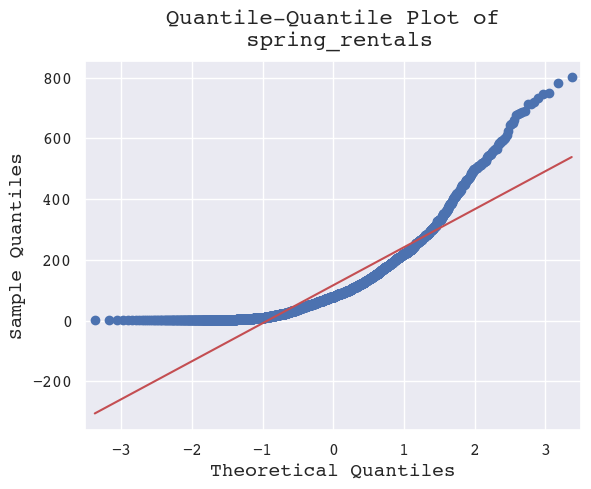

In [83]:
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(spring_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n spring_rentals", y=1.02, fontsize=16, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

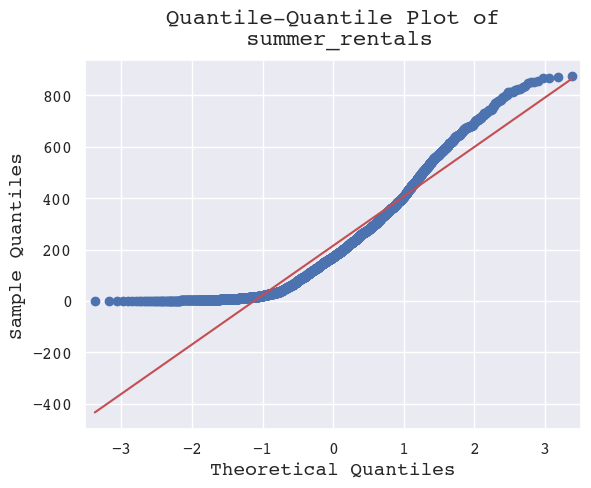

In [84]:
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(summer_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n summer_rentals", y=1.02, fontsize=16, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

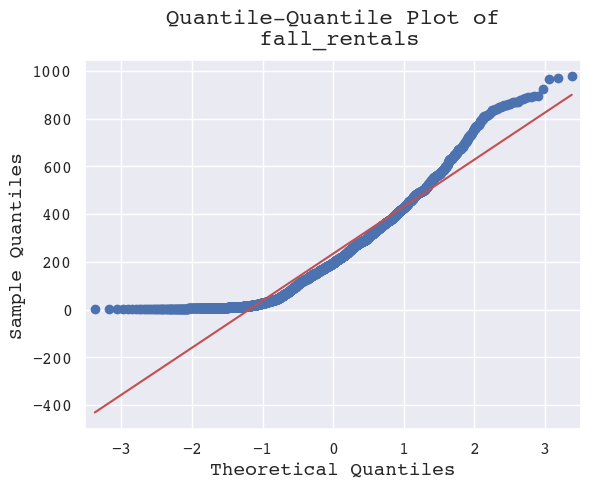

In [85]:
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(fall_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n fall_rentals", y=1.02, fontsize=16, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

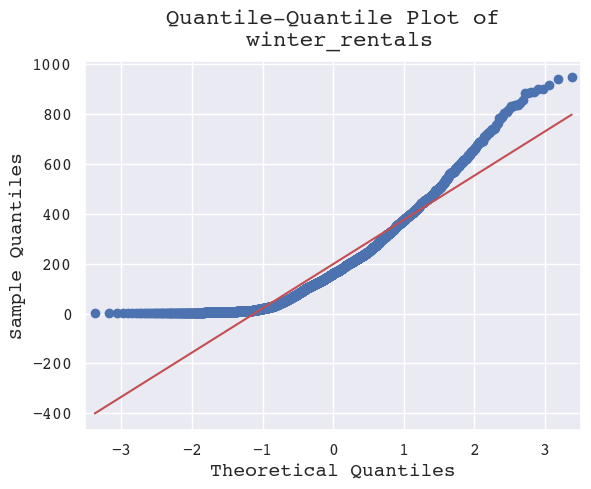

In [86]:
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(winter_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n winter_rentals", y=1.02, fontsize=16, fontname='Courier')
plt.show()

## KRUSKAL TEST

In [89]:
Ho='Number of cycles rented remains same across season'
Ha='Number of cycles rented is different across season'

f_stats, p_value = kruskal(
    spring_rentals,
    summer_rentals,
    fall_rentals,
    winter_rentals
)
print(p_value)
if p_value<.5:
    print('reject Ho')
    print(Ha)
else:
    print('fail to reject Ho')
    print(Ho)

2.479008372608633e-151
reject Ho
Number of cycles rented is different across season


The extremely low p-value (2.479008372608633e-151) from the Kruskal-Wallis test suggests that there is a significant difference in the number of cycles rented across different seasons. With this rejection of the null hypothesis (Ho), which stated that the number of cycles rented is the same across seasons, you can derive insights and recommendations:

Insights:

Seasonal Variation in Demand: The analysis reveals that rental demand for electric cycles varies significantly with the seasons. Different seasons have a notable impact on the number of cycles rented.

Weather and Seasonal Influence: Seasonal changes often correlate with variations in weather conditions. Weather, temperature, and daylight hours can influence people's preferences for outdoor activities, including bike rentals.

Tourism and Leisure: Certain seasons may attract more tourists or lead to an increase in leisure activities. This can result in higher demand for electric cycles during those periods.

Recommendations:

Seasonal Fleet Management: Yulu should consider adjusting its fleet size and distribution based on seasonal demand patterns. Allocate more vehicles to locations with increased demand during specific seasons.

Pricing Strategies: Implement dynamic pricing that considers seasonal variations. Adjust pricing to attract more riders during peak seasons while offering discounts or promotions during off-peak periods to maintain consistent ridership.

Seasonal Marketing Campaigns: Launch marketing campaigns tailored to the unique characteristics of each season. Highlight the benefits of renting electric cycles during specific seasons, such as leisurely rides in summer or eco-friendly commuting in spring.

Weather-Based Recommendations: Incorporate real-time weather data into the Yulu app to provide users with weather forecasts and tips on using electric cycles comfortably and safely during different seasons.

## CHI SQUARE

In [57]:
#Chi-squared test for independence of weather and season
#Step 1: Hypotheses Formulation
#Null Hypothesis (H0):
H0 = "There is no association between weather and season"
#Alternative Hypothesis (Ha):
Ha = "There is association between weather and season"
#Step 2: Choice of Distribution
#Categorical data is compared with categorical data and their independence needs to be tested.
#Hence chi2_contingency test is used
#Step 3: Directionality of the Test
#In this case, the alternative hypothesis does not specify the direction of the effect (whether it's an increase or decrease).
#It simply states that an association exists. Therefore, this is a two-tailed or two-sided hypothesis test.
#Step 4: Computation of p-value
chi_stat, p_value, dof, exp_freq = chi2_contingency(pd.crosstab(yulu["season"], yulu["weather"]))
print(chi_stat, p_value, dof, exp_freq)
#Step 5: Hypothesis Testing
if p_value < alpha:
 print("Reject H0,", Ha)
else:
 print("Failed to reject H0,", H0)

49.158655596893624 1.549925073686492e-07 9 [[1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.77454639e+03 2.46738931e-01 2.11948742e+02 6.99258130e+02]
 [1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.80625831e+03 2.51148264e-01 2.15736359e+02 7.11754180e+02]]
Reject H0, There is association between weather and season


The outcome of the chi-square test, which rejects the null hypothesis and suggests an association between weather and season, provides insights into the relationship between these two variables. Here are insights and recommendations based on this finding:

Insights:

Weather-Season Dependence: The chi-square test results indicate that weather conditions and seasons are not independent variables. There is a significant association between the two, implying that certain weather conditions are more likely to occur during specific seasons.

Weather Pattern Variation: The association between weather and season suggests that the Indian market experiences distinct weather patterns during different parts of the year. Understanding these patterns can help Yulu tailor its services and promotions.

Recommendations:

Seasonal Promotions: Develop seasonal promotions and marketing campaigns that align with the expected weather conditions for each season. For example, highlight electric cycle rentals as a convenient and eco-friendly mode of transportation during pleasant seasons.

Weather-Based Planning: Incorporate weather forecasts into business planning and operations. Adjust the fleet size, maintenance schedules, and staff allocation based on anticipated weather changes.

Weather-Responsive Pricing: Implement dynamic pricing strategies that take into account both seasonality and expected weather conditions. For instance, offer discounts during seasons with less favorable weather to incentivize rentals.

## Business Recommendations

Weather-Based Strategies: Implement weather-responsive strategies by offering promotions, discounts, or incentives on days with less favorable weather conditions. Additionally, highlight the convenience and suitability of electric cycles during clear and pleasant weather.

Seasonal Planning: Tailor operations, marketing efforts, and promotions to align with seasonal variations in demand. Adjust fleet size, maintenance schedules, and staffing levels based on expected seasonal changes.

Customer Engagement: Engage with customers to understand their preferences and needs during different seasons and weather conditions. Gather feedback and use it to customize offerings.

Dynamic Pricing: Consider implementing dynamic pricing strategies that take into account both seasonality and expected weather conditions. Offer competitive pricing during peak demand seasons and adjust prices during less favorable conditions.

Data-Driven Insights: Continuously analyze user data, rental patterns, and market trends to identify opportunities and optimize business strategies. Use data to make informed decisions regarding pricing, promotions, and fleet management.

Safety and Maintenance: Prioritize the safety and maintenance of electric cycles during adverse weather conditions. Ensure that vehicles are well-prepared to handle challenging weather and provide safety guidelines to users.

Collaborative Partnerships: Explore collaborations with local businesses, events, or organizations that are affected by seasonal and weather variations. Joint promotions and partnerships can attract more users and enhance brand visibility.

User Education: Educate users about the suitability of electric cycles for different weather conditions and seasons. Provide tips and guidelines for safe riding during adverse weather.

Robust Statistical Methods: Recognize the significance of normality and equal variance assumptions in statistical analyses. Use robust statistical methods when dealing with non-normally distributed data or when assumptions are violated.

Documentation and Transparency: Maintain clear documentation of data analysis results, including statistical tests and their outcomes. Ensure transparency in decision-making processes and share insights with stakeholders.

Continuous Monitoring: Continuously monitor and assess the effectiveness of implemented strategies. Make data-driven adjustments as needed to stay responsive to changing market dynamics.

Customer-Centric Approach: Keep the customer experience at the forefront of decision-making. Ensure that all strategies and changes are designed to enhance user satisfaction and meet their evolving needs.

Innovation: Explore opportunities for innovation, such as introducing new electric cycle models, improving the mobile app, or expanding into new markets, to stay competitive and meet the evolving demands of customers.

By implementing these recommendations, Yulu can enhance its business strategies, improve user engagement, and adapt to the dynamic nature of the micro-mobility market in India.